# HF Takehome Code

### Initial Imports

In [437]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Reading and exploring the csv

In [438]:
initial_df = pd.read_csv("altana_features", index_col = 0)
df = initial_df.copy()

In [439]:
df.describe()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Target 1,Target 2
count,259.000000,259.000000,260.000000,260.000000,259.000000,259.000000,208.000000,208.000000,208.000000,208.000000,...,467.000000,467.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,517.000000,517.000000
mean,0.002278,0.001930,0.349438,0.650562,0.009954,0.002339,1.007568,1.006604,1.001500,0.999126,...,0.752112,1.693335,1.054201,1.121967,-1.197166,0.954766,0.915134,0.878141,0.003699,0.015608
std,0.092910,0.093167,0.036805,0.036805,0.161833,0.089401,0.121969,0.103017,0.062548,0.053722,...,0.187026,0.607209,0.047390,0.152628,54.124115,0.032401,0.054718,0.068041,0.066523,0.191358
min,-0.480226,-0.482138,0.245373,0.568265,-0.642701,-0.432821,0.728084,0.759569,0.840961,0.840961,...,0.341758,1.005336,1.006883,1.013861,-1233.000000,0.685962,0.522026,0.443405,-0.333333,-0.467135
25%,-0.019418,-0.022128,0.323769,0.624544,-0.074530,-0.032890,0.927269,0.943736,0.958527,0.958575,...,0.592939,1.269540,1.027695,1.056969,1.090066,0.944599,0.895014,0.848450,-0.030209,-0.081218
50%,0.001599,0.000403,0.351337,0.648663,0.005935,-0.000734,0.997372,1.006875,1.001561,0.996550,...,0.782477,1.510823,1.041799,1.087245,1.136735,0.962264,0.927273,0.892929,0.002247,0.004591
75%,0.021796,0.022361,0.375456,0.676231,0.082855,0.032550,1.080812,1.075984,1.043054,1.029195,...,0.926552,1.885462,1.064303,1.137444,1.223580,0.975509,0.952189,0.924575,0.037377,0.086314
max,0.540181,0.477924,0.431735,0.754627,0.813219,0.457108,1.412478,1.412478,1.168411,1.151026,...,1.000000,3.989691,1.514377,3.118421,5.814978,0.991402,0.982951,0.973767,0.258065,1.335546


In [440]:
df.describe().loc['count'].mean()

286.6079734219269

In [441]:
df.iloc[:,-2:].head(10)

,Target 1,Target 2
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,0.028682,0.000000
6,-0.023379,0.022637
7,-0.030209,-0.078733
8,0.039169,0.020460
9,0.016043,0.063583


### Cleaning

In [442]:
# finding rows with NA values present even in the targets
# if no target variable, it can be removed
removable_rows = df[df.iloc[:,-1].isnull()].index.tolist()

In [443]:
# remove rows
df = df.drop(axis = 0, index = removable_rows)

In [444]:
# ensure type of index constant
df.index.astype(int)

Int64Index([  5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
            ...
            512, 513, 514, 515, 516, 517, 518, 519, 520, 521],
           dtype='int64', length=517)

In [445]:
# another look now rows are removed
df

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Target 1,Target 2
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.043512,1.090984,1.124894,0.973112,0.947632,0.911610,0.028682,0.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.031051,1.064092,1.132983,0.945946,0.897436,0.873819,-0.023379,0.022637
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.025949,1.053281,1.108619,0.954753,0.913424,0.892798,-0.030209,-0.078733
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.033386,1.069079,1.095198,0.978179,0.957290,0.928571,0.039169,0.020460
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.019417,1.039604,1.062583,0.979622,0.960058,0.942817,0.016043,0.063583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.010680,-0.022057,0.342507,0.657493,-0.159120,0.089510,0.917610,0.879080,1.049068,1.077186,...,0.842070,1.401890,1.032196,1.066535,1.086445,0.983108,0.966777,0.938477,0.017346,-0.064209
518,0.046431,0.048614,0.369707,0.630293,0.129534,0.003141,1.044890,0.990931,0.975420,1.005397,...,0.832721,1.386326,1.035571,1.073766,1.101428,0.977145,0.955312,0.924960,-0.011494,0.095432
519,-0.001670,-0.005891,0.320944,0.679056,-0.133347,0.075567,0.842823,0.828912,1.096660,1.108097,...,0.802003,1.305435,1.030606,1.063145,1.128406,0.948407,0.901877,0.878352,-0.036502,0.107279
520,-0.048827,-0.052168,0.308445,0.691555,-0.085870,-0.031319,0.866960,0.806100,1.073472,1.120178,...,0.890484,1.449457,1.089461,1.196501,1.268188,0.954887,0.913669,0.849904,0.107098,0.125907


In [446]:
# creating feature matrix
X_raw = df.iloc[:, :-2]
X_raw

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.043512,1.090984,1.124894,0.973112,0.947632,0.911610
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.031051,1.064092,1.132983,0.945946,0.897436,0.873819
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.025949,1.053281,1.108619,0.954753,0.913424,0.892798
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.033386,1.069079,1.095198,0.978179,0.957290,0.928571
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.019417,1.039604,1.062583,0.979622,0.960058,0.942817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.010680,-0.022057,0.342507,0.657493,-0.159120,0.089510,0.917610,0.879080,1.049068,1.077186,...,0.922121,1.144803,0.842070,1.401890,1.032196,1.066535,1.086445,0.983108,0.966777,0.938477
518,0.046431,0.048614,0.369707,0.630293,0.129534,0.003141,1.044890,0.990931,0.975420,1.005397,...,0.911883,1.132093,0.832721,1.386326,1.035571,1.073766,1.101428,0.977145,0.955312,0.924960
519,-0.001670,-0.005891,0.320944,0.679056,-0.133347,0.075567,0.842823,0.828912,1.096660,1.108097,...,0.881468,1.090331,0.802003,1.305435,1.030606,1.063145,1.128406,0.948407,0.901877,0.878352
520,-0.048827,-0.052168,0.308445,0.691555,-0.085870,-0.031319,0.866960,0.806100,1.073472,1.120178,...,0.987778,1.210622,0.890484,1.449457,1.089461,1.196501,1.268188,0.954887,0.913669,0.849904


In [447]:
# creating dataframe with two target variable vectors
y_raw = df.iloc[:, -2:]
y_raw

,Target 1,Target 2
5,0.028682,0.000000
6,-0.023379,0.022637
7,-0.030209,-0.078733
8,0.039169,0.020460
9,0.016043,0.063583
...,...,...
517,0.017346,-0.064209
518,-0.011494,0.095432
519,-0.036502,0.107279
520,0.107098,0.125907


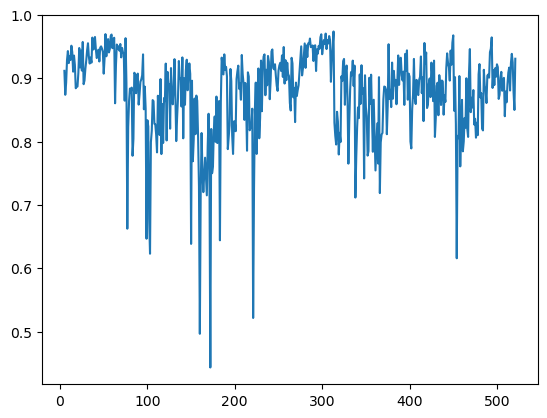

In [448]:
# I input various indices at this point as further exploration
# looking for missing values from the first non-null value
# to see if imputation is needed
# it is also noted there are multiple outliers, but I did not have time to go back and deal with these
plt.plot(X_raw.iloc[:,298], scaley = True)
plt.show();

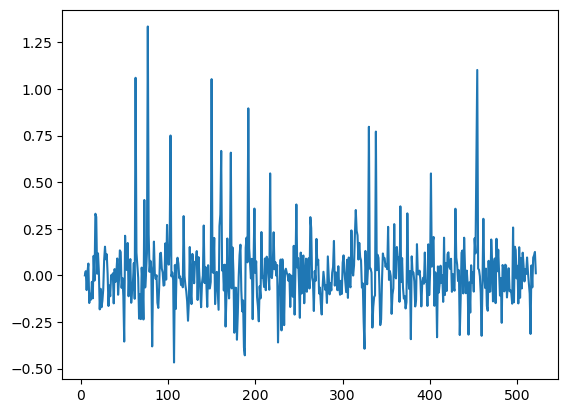

In [449]:
# Similar with target variable, although would not impute
plt.plot(y_raw.iloc[:,1])
plt.show();

In [450]:
# Checking means of data
# Here we find that there are rows with means of nan and inf, suggesting they have no data/incorrect data
for col in X_raw.columns:
    print(X_raw.loc[:,col].mean())

0.0022784272323153896
0.0019298557614474206
0.34943804031011494
0.6505619596898854
0.009954052798001323
0.002339322694291123
1.0075682954539873
1.0066037056436425
1.0015002372130266
0.999126301066146
0.005644001499002563
0.029066312258047344
0.030634521272000507
0.042902042297784666
0.0912246734591488
0.9968866972167256
1.0027887624667051
0.9936127824423673
0.9991930519720976
0.9965173043976393
0.9928307994295974
0.008707738183713091
0.01100642071302701
0.9868976964543413
0.021109976285482977
1.0969036802872014
0.008751587392885495
0.003955226961455913
0.001983084075957491
0.5392591802275594
0.46074081977244064
0.5091992866701657
0.49901659980794233
0.47507978219763064
0.049023325155960445
0.0066741644760460106
0.03638644051771949
0.005178310615737359
0.013167715544768614
0.0015460046814067816
0.016419626831935836
0.0019701042635156454
1.1906116128992972
0.0013803743400487407
1.2256906890540487
0.0013359386688376297
1.6235587324064886
0.001095164171518942
1.5057477707323665
0.001274932

In [451]:
# creating a df without null features
nonnulls = X_raw.count()
X_nonnull = X_raw[nonnulls[nonnulls != 0].index]

In [452]:
X_nonnull

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.043512,1.090984,1.124894,0.973112,0.947632,0.911610
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.031051,1.064092,1.132983,0.945946,0.897436,0.873819
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.025949,1.053281,1.108619,0.954753,0.913424,0.892798
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.033386,1.069079,1.095198,0.978179,0.957290,0.928571
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.019417,1.039604,1.062583,0.979622,0.960058,0.942817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.010680,-0.022057,0.342507,0.657493,-0.159120,0.089510,0.917610,0.879080,1.049068,1.077186,...,0.922121,1.144803,0.842070,1.401890,1.032196,1.066535,1.086445,0.983108,0.966777,0.938477
518,0.046431,0.048614,0.369707,0.630293,0.129534,0.003141,1.044890,0.990931,0.975420,1.005397,...,0.911883,1.132093,0.832721,1.386326,1.035571,1.073766,1.101428,0.977145,0.955312,0.924960
519,-0.001670,-0.005891,0.320944,0.679056,-0.133347,0.075567,0.842823,0.828912,1.096660,1.108097,...,0.881468,1.090331,0.802003,1.305435,1.030606,1.063145,1.128406,0.948407,0.901877,0.878352
520,-0.048827,-0.052168,0.308445,0.691555,-0.085870,-0.031319,0.866960,0.806100,1.073472,1.120178,...,0.987778,1.210622,0.890484,1.449457,1.089461,1.196501,1.268188,0.954887,0.913669,0.849904


In [453]:
trainable_cols = X_nonnull.count() > (X_nonnull.count().max()*0.4)
X_trainable = X_nonnull[trainable_cols[trainable_cols != False].index]
# we want to split X into training and test sets
# with a standard 80/20 split, we need at least 20+20 = 40% of the overall series to be non-null
# this is because we want the training and test splits to at least be the same size
# I found that the remaining number of features was the same for 0.2 of max count as well
# 236 cols

In [454]:
print(X_trainable.count().min())
X_trainable

208


,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.043512,1.090984,1.124894,0.973112,0.947632,0.911610
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.031051,1.064092,1.132983,0.945946,0.897436,0.873819
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.025949,1.053281,1.108619,0.954753,0.913424,0.892798
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.033386,1.069079,1.095198,0.978179,0.957290,0.928571
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.019417,1.039604,1.062583,0.979622,0.960058,0.942817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,-0.010680,-0.022057,0.342507,0.657493,-0.159120,0.089510,0.917610,0.879080,1.049068,1.077186,...,0.922121,1.144803,0.842070,1.401890,1.032196,1.066535,1.086445,0.983108,0.966777,0.938477
518,0.046431,0.048614,0.369707,0.630293,0.129534,0.003141,1.044890,0.990931,0.975420,1.005397,...,0.911883,1.132093,0.832721,1.386326,1.035571,1.073766,1.101428,0.977145,0.955312,0.924960
519,-0.001670,-0.005891,0.320944,0.679056,-0.133347,0.075567,0.842823,0.828912,1.096660,1.108097,...,0.881468,1.090331,0.802003,1.305435,1.030606,1.063145,1.128406,0.948407,0.901877,0.878352
520,-0.048827,-0.052168,0.308445,0.691555,-0.085870,-0.031319,0.866960,0.806100,1.073472,1.120178,...,0.987778,1.210622,0.890484,1.449457,1.089461,1.196501,1.268188,0.954887,0.913669,0.849904


<br>

### Individual feature significance

In [455]:
# creating an empty dataframe for the correlations
correlations = pd.DataFrame(index=X_trainable.columns, columns=['Feature 1', 'Feature 2'])

# correlations
for i in range(len(X_trainable.columns)):
    col = X_trainable.iloc[:, i]
    # rather than filling backwards (which impacts variance hence correlation)
    # I choose here to run correlations between feature and target, only using pre-existing non-null values
    # so we drop all nan values from any given trainable column
    col.dropna(inplace = True)
    
    # then obtain the raw data for each target, matching the range of non-null values in the feature column
    y1 = y_raw.loc[col.index[0]:, 'Target 1']
    y2 = y_raw.loc[col.index[0]:, 'Target 2']
    
    # then concatenate feature and target into a temporary dataframe and run correlations
    corr1 = pd.concat([col, y1], axis=1).corr()
    corr2 = pd.concat([col, y2], axis=1).corr()

    # finally fill out the correlations df with correlations
    correlations.iloc[i, 0] = corr1.iloc[0,1]
    correlations.iloc[i, 1] = corr2.iloc[0,1] 

In [456]:
# split correlations into separate target series
t1_corrs = correlations.iloc[:,0]
t2_corrs = correlations.iloc[:,1]

In [498]:
# filter out by values larger than 0.3 or smaller than -0.3
t1_corrs.sort_values(ascending = False)

Feature 251    0.990333
Feature 267    0.691742
Feature 138    0.631532
Feature 266    0.461159
Feature 297    0.414216
                 ...   
Feature 1     -0.163646
Feature 2     -0.165393
Feature 283   -0.188526
Feature 264   -0.333365
Feature 265   -0.334345
Name: Feature 1, Length: 236, dtype: object

### Selecting decently-correlated features

In [458]:
to_drop = []
for i in range(len(t1_corrs)):
    if -0.3 < t1_corrs[i] < 0.3:
        # converting the pd series to a list and then returning the index of the value
        # this seems to be the fastest way to do so
        to_drop.append(t1_corrs.index[t1_corrs.tolist().index(t1_corrs[i])])

In [459]:
# dropping the features with negligible correlations 
t1_hi_corr = t1_corrs.drop(to_drop)
t1_hi_corr

Feature 130    0.303957
Feature 131    0.331897
Feature 132    0.372968
Feature 136    0.310157
Feature 137    0.352051
Feature 138    0.631532
Feature 232   -0.003733
Feature 251    0.990333
Feature 264   -0.333365
Feature 265   -0.334345
Feature 266    0.461159
Feature 267    0.691742
Feature 289    0.018525
Feature 290     0.32793
Feature 291    0.305344
Feature 297    0.414216
Feature 298    0.399054
Name: Feature 1, dtype: object

In [460]:
# doing the same with target 2
# N.B. I could have done better with using functions to stop the code replication
to_drop = []
for i in range(len(t2_corrs)):
    if -0.3 < t2_corrs[i] < 0.3:
        # converting the pd series to a list and then returning the index of the value
        # this seems to be the fastest way to do so
        to_drop.append(t2_corrs.index[t2_corrs.tolist().index(t2_corrs[i])])

In [461]:
t2_hi_corr = t2_corrs.drop(to_drop)
t2_hi_corr

Feature 174    0.480734
Feature 175     0.42055
Feature 191    0.327223
Feature 199   -0.302513
Feature 232    0.004793
Feature 254    0.314956
Feature 255    0.320456
Feature 256    0.325682
Feature 257    0.304655
Feature 260    0.976039
Feature 261    0.649302
Feature 262    0.470896
Feature 263     0.39233
Feature 264    0.515907
Feature 265    0.481646
Feature 266    0.316455
Feature 267    -0.36148
Feature 273   -0.348692
Feature 289   -0.067862
Feature 294    0.440281
Feature 295    0.389503
Feature 297   -0.465077
Feature 298   -0.460975
Feature 299   -0.476274
Name: Feature 2, dtype: object

In [462]:
# Some seem to escape the filter so I manually remove them
t1_hi_corr.drop(['Feature 289'], inplace=True)
t2_hi_corr.drop(['Feature 232','Feature 289'], inplace=True)

In [463]:
t2_hi_corr

Feature 174    0.480734
Feature 175     0.42055
Feature 191    0.327223
Feature 199   -0.302513
Feature 254    0.314956
Feature 255    0.320456
Feature 256    0.325682
Feature 257    0.304655
Feature 260    0.976039
Feature 261    0.649302
Feature 262    0.470896
Feature 263     0.39233
Feature 264    0.515907
Feature 265    0.481646
Feature 266    0.316455
Feature 267    -0.36148
Feature 273   -0.348692
Feature 294    0.440281
Feature 295    0.389503
Feature 297   -0.465077
Feature 298   -0.460975
Feature 299   -0.476274
Name: Feature 2, dtype: object

In [464]:
# exploring the remaining individual features
t1_individual_features = []
for feature in X_trainable.columns:
    if feature in t1_hi_corr.index:
        print(feature, X_trainable.loc[:, feature].count())
        t1_individual_features.append(feature)

Feature 130 324
Feature 131 324
Feature 132 324
Feature 136 324
Feature 137 324
Feature 138 324
Feature 232 514
Feature 251 517
Feature 264 516
Feature 265 511
Feature 266 517
Feature 267 517
Feature 290 508
Feature 291 508
Feature 297 517
Feature 298 517


In [465]:
t2_individual_features = []
for feature in X_trainable.columns:
    if feature in t2_hi_corr.index:
        print(feature, X_trainable.loc[:, feature].count())
        t2_individual_features.append(feature)

Feature 174 322
Feature 175 319
Feature 191 299
Feature 199 299
Feature 254 517
Feature 255 517
Feature 256 517
Feature 257 517
Feature 260 517
Feature 261 516
Feature 262 516
Feature 263 512
Feature 264 516
Feature 265 511
Feature 266 517
Feature 267 517
Feature 273 517
Feature 294 517
Feature 295 517
Feature 297 517
Feature 298 517
Feature 299 517


### Model Training

I choose XGboost.

This is why I am happy to select based on correlations with differing timescales.

Although this is somewhat poor practice, I want to cast my net wide and see if these are worth pouring more time into.

XGBoost can handle the NaN values as it bins the data.

I do end up removing these as their importance to the model is low, and indeed, performance is hardly impacted.

In [466]:
# importing

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, r2_score)

In [467]:
# separator placed at the 80% mark to reflect an 80/20 train/test split
separator = 517 - 517//5
separator

414

In [468]:
# filtering the trainable dataframe to include the features we want to incorporate
df_t1 = X_trainable.copy()[t1_individual_features]

# train/test split
X_train1 = df_t1.loc[df_t1.index < separator]
X_test1 = df_t1.loc[df_t1.index >= separator]
y_train1 = y1.loc[y1.index < separator]
y_test1 = y1.loc[y1.index >= separator]

# instantiation and fitting
# early stopping rounds allows model to stop iterating if it starts to overfit
t1_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t1_regressor.fit(X_train1, y_train1,
                 eval_set = [(X_train1, y_train1), (X_test1, y_test1)],
                 verbose = 100)

[0]	validation_0-rmse:0.45391	validation_1-rmse:0.44075
[99]	validation_0-rmse:0.00256	validation_1-rmse:0.00859


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [469]:
# creating a dataframe with the importance and feature names
fi1 = pd.DataFrame(t1_regressor.feature_importances_, index = t1_regressor.feature_names_in_, columns = ['importance'])

In [470]:
fi1
# using feature importance shows generally which factors are used in the model
# it is not 100% accurate n a factor by factor basis 
# this is because it deals with multicollinearity by reducing importance of correlated series
# i.e. by removing one, the other is still there so it is not that important
# the crucial thing is performance though so I am happy to keep relatively unimportant features

,importance
Feature 130,0.001989
Feature 131,0.002239
Feature 132,0.003054
Feature 136,0.002497
Feature 137,0.002258
Feature 138,0.003221
Feature 232,0.004201
Feature 251,0.928936
Feature 264,0.004689
Feature 265,0.005441


#### Testing the Model on Target 1

In [471]:
predictions = t1_regressor.predict(X_test1)

In [472]:
# evaluation dataframe that places actual and predicted values together
# this allows us to use r2 measure later
y1_eval = pd.DataFrame({'period': y_test1.index,'actual':y_test1.values, 'prediction': predictions})
y1_eval.set_index('period', inplace=True)

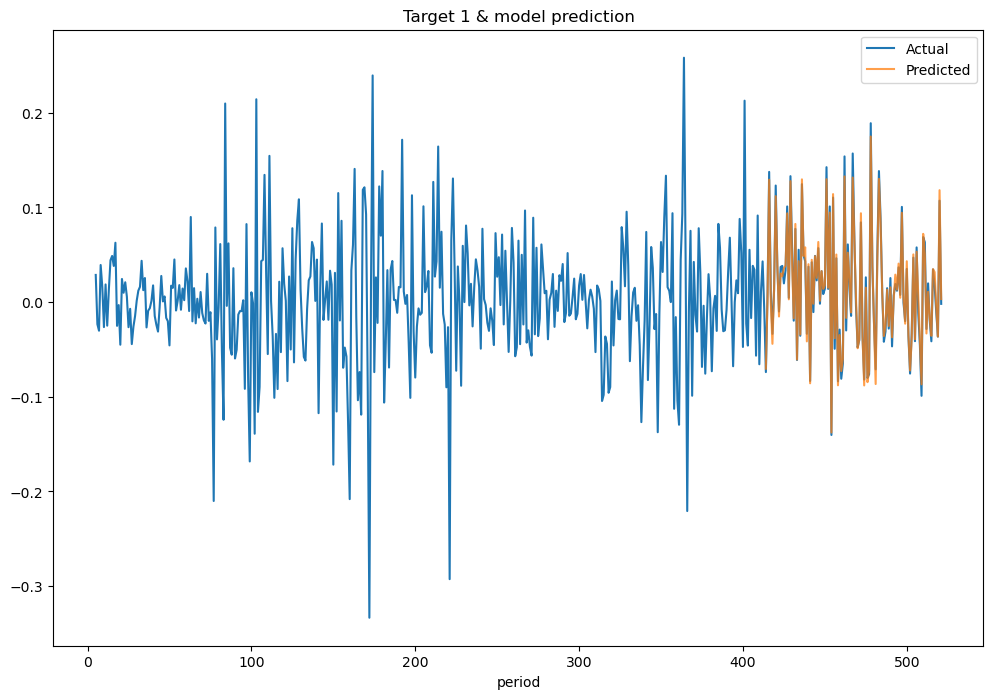

In [473]:
# visualisation
ax1 = y1.plot(figsize = (12,8))
y1_eval['prediction'].plot(ax = ax1, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax1.set_title('Target 1 & model prediction')
plt.show();

#### Training model on Target 2

In [474]:
df_t2 = X_trainable.copy()[t2_individual_features]
X_train2 = df_t2.loc[df_t2.index < separator]
X_test2 = df_t2.loc[df_t2.index >= separator]
y_train2 = y2.loc[y2.index < separator]
y_test2 = y2.loc[y2.index >= separator]

t2_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t2_regressor.fit(X_train2, y_train2,
                 eval_set = [(X_train2, y_train2), (X_test2, y_test2)],
                 verbose = 100)

fi2 = pd.DataFrame(t2_regressor.feature_importances_, index = t2_regressor.feature_names_in_, columns = ['importance'])
fi2

[0]	validation_0-rmse:0.47120	validation_1-rmse:0.46587
[99]	validation_0-rmse:0.00468	validation_1-rmse:0.03925


,importance
Feature 174,0.001392
Feature 175,0.003545
Feature 191,0.002205
Feature 199,0.001169
Feature 254,0.014540
Feature 255,0.018901
Feature 256,0.006232
Feature 257,0.012422
Feature 260,0.861139
Feature 261,0.007487


#### Testing on Target 2

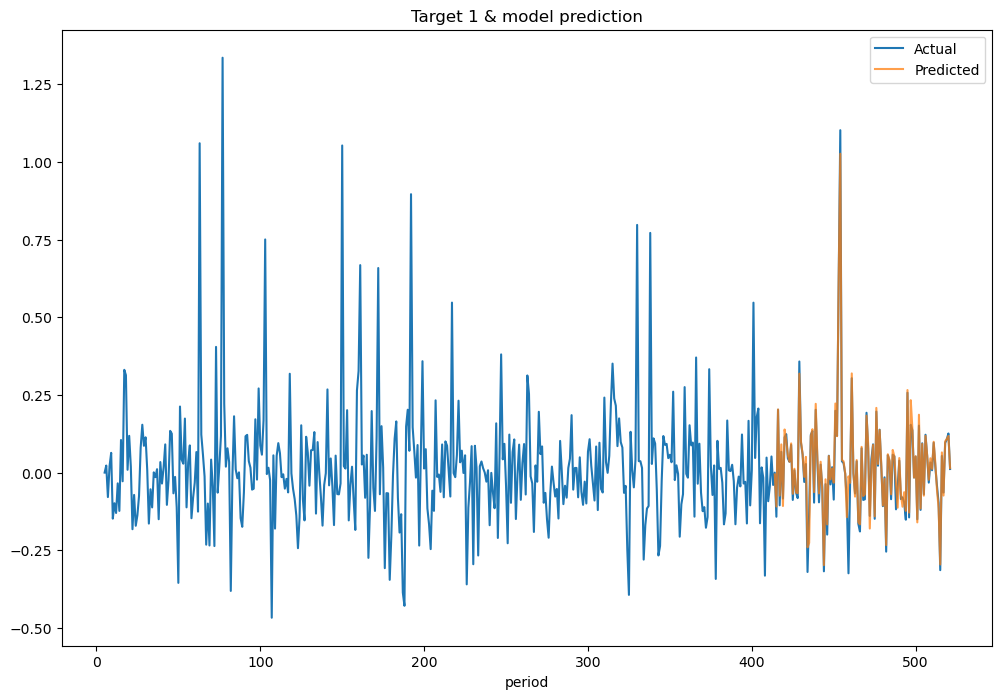

In [392]:
# predict
predictions = t2_regressor.predict(X_test2)
y2_eval = pd.DataFrame({'period': y_test2.index,'actual':y_test2.values, 'prediction': predictions})
y2_eval.set_index('period', inplace=True)

# plot
ax2 = y2.plot(figsize = (12,8))
y2_eval['prediction'].plot(ax = ax2, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax2.set_title('Target 1 & model prediction')
plt.show();

#### Evaluation

In [393]:
# r2 score 
t1_rsq = r2_score(y1_eval['actual'], y1_eval['prediction'])
t1_rsq

0.9843234196118886

In [395]:
t2_rsq = r2_score(y2_eval['actual'], y2_eval['prediction'])
t2_rsq

0.9493350216123891

### Tuning the model by selecting different features

I want to remove the features shown before with a far shorter timespan and see if these are important to the dataset.
If they are then I try to interpolate. If not, we move on without them.

I run the exact same code.

In [480]:
# this dataframe right here is the only thing I change about each block
t1_features_maxlen = []
for feature in t1_individual_features:
    if X_trainable.loc[:, feature].count() > 500:
        t1_features_maxlen.append(feature)
        
t1_features_maxlen

['Feature 232',
 'Feature 251',
 'Feature 264',
 'Feature 265',
 'Feature 266',
 'Feature 267',
 'Feature 290',
 'Feature 291',
 'Feature 297',
 'Feature 298']

In [481]:
t2_features_maxlen = []
for feature in t2_individual_features:
    if X_trainable.loc[:, feature].count() > 500:
        t2_features_maxlen.append(feature)
        
t2_features_maxlen

['Feature 254',
 'Feature 255',
 'Feature 256',
 'Feature 257',
 'Feature 260',
 'Feature 261',
 'Feature 262',
 'Feature 263',
 'Feature 264',
 'Feature 265',
 'Feature 266',
 'Feature 267',
 'Feature 273',
 'Feature 294',
 'Feature 295',
 'Feature 297',
 'Feature 298',
 'Feature 299']

In [482]:
# you see the new dataframe instead of t1_individual_features
# same goes for t2
df_t1 = X_trainable.copy()[t1_features_maxlen]
X_train1 = df_t1.loc[df_t1.index < separator]
X_test1 = df_t1.loc[df_t1.index >= separator]
y_train1 = y1.loc[y1.index < separator]
y_test1 = y1.loc[y1.index >= separator]

t1_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t1_regressor.fit(X_train1, y_train1,
                 eval_set = [(X_train1, y_train1), (X_test1, y_test1)],
                 verbose = 100)

fi1 = pd.DataFrame(t1_regressor.feature_importances_, index = t1_regressor.feature_names_in_, columns = ['importance'])
fi1

[0]	validation_0-rmse:0.45391	validation_1-rmse:0.44075
[99]	validation_0-rmse:0.00260	validation_1-rmse:0.00859


,importance
Feature 232,0.003693
Feature 251,0.944953
Feature 264,0.004785
Feature 265,0.005331
Feature 266,0.007164
Feature 267,0.020147
Feature 290,0.004683
Feature 291,0.005204
Feature 297,0.004041
Feature 298,0.000000


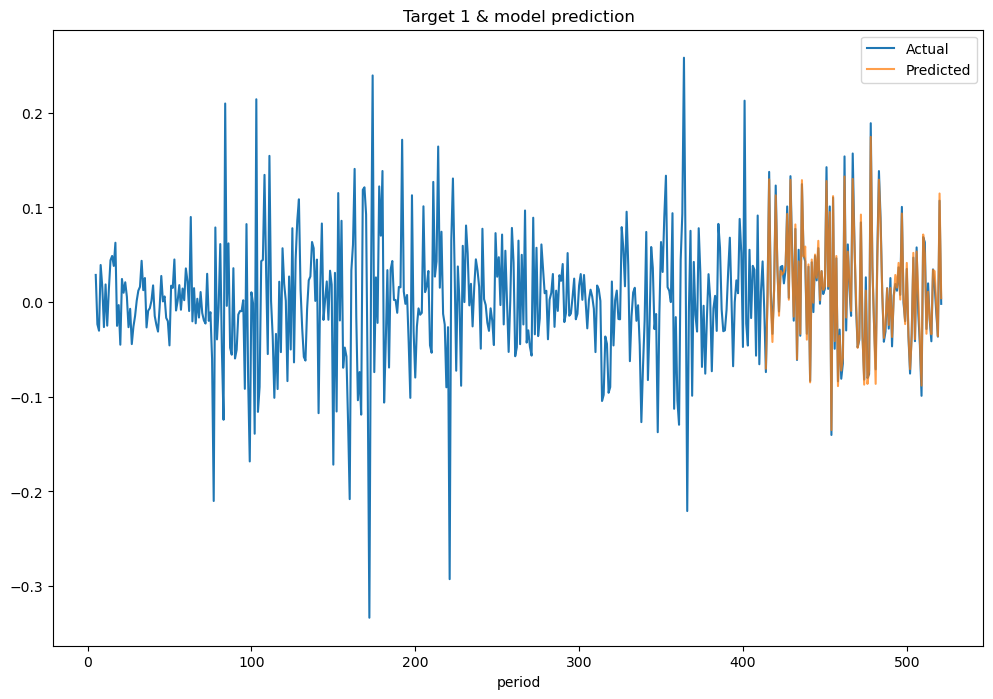

In [483]:
predictions = t1_regressor.predict(X_test1)
y1_eval = pd.DataFrame({'period': y_test1.index,'actual':y_test1.values, 'prediction': predictions})
y1_eval.set_index('period', inplace=True)

ax1 = y1.plot(figsize = (12,8))
y1_eval['prediction'].plot(ax = ax1, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax1.set_title('Target 1 & model prediction')
plt.show();

In [484]:
# R-sq impacted marginally positively
t1_rsq = r2_score(y1_eval['actual'], y1_eval['prediction'])
t1_rsq

0.9844283672895106

-----------------------------------------------

In [485]:
df_t2 = X_trainable.copy()[t2_individual_features]
X_train2 = df_t2.loc[df_t2.index < separator]
X_test2 = df_t2.loc[df_t2.index >= separator]
y_train2 = y2.loc[y2.index < separator]
y_test2 = y2.loc[y2.index >= separator]

t2_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t2_regressor.fit(X_train2, y_train2,
                 eval_set = [(X_train2, y_train2), (X_test2, y_test2)],
                 verbose = 100)

fi2 = pd.DataFrame(t2_regressor.feature_importances_, index = t2_regressor.feature_names_in_, columns = ['importance'])
fi2

[0]	validation_0-rmse:0.47120	validation_1-rmse:0.46587
[98]	validation_0-rmse:0.00476	validation_1-rmse:0.03923


,importance
Feature 174,0.001392
Feature 175,0.003545
Feature 191,0.002205
Feature 199,0.001169
Feature 254,0.014540
Feature 255,0.018901
Feature 256,0.006232
Feature 257,0.012422
Feature 260,0.861139
Feature 261,0.007487


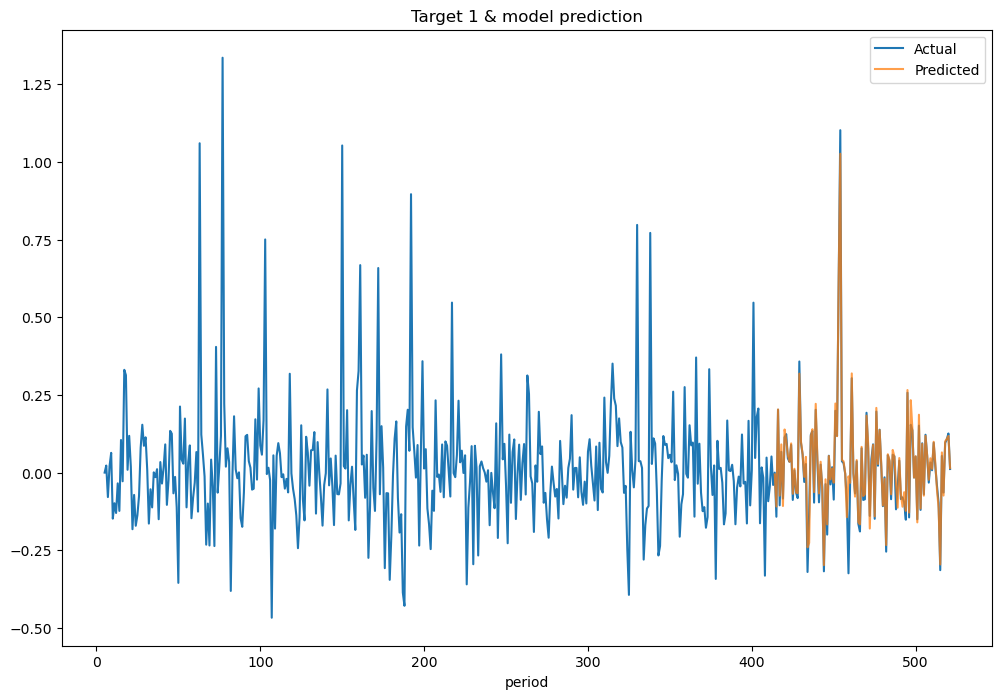

In [486]:
predictions = t2_regressor.predict(X_test2)
y2_eval = pd.DataFrame({'period': y_test2.index,'actual':y_test2.values, 'prediction': predictions})
y2_eval.set_index('period', inplace=True)

ax2 = y2.plot(figsize = (12,8))
y2_eval['prediction'].plot(ax = ax2, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax2.set_title('Target 1 & model prediction')
plt.show();

In [487]:
# r-squared hardly changed
t2_rsq = r2_score(y2_eval['actual'], y2_eval['prediction'])
t2_rsq

0.9493350216123891

### Final Tuning

Finally I remove the features with 0 importance.

In [489]:
t1_features_tuned = [feat for feat in t1_features_maxlen if feat not in ['Feature 298']]
t1_features_tuned

['Feature 232',
 'Feature 251',
 'Feature 264',
 'Feature 265',
 'Feature 266',
 'Feature 267',
 'Feature 290',
 'Feature 291',
 'Feature 297']

In [490]:
t2_features_tuned = [feat for feat in t2_features_maxlen if feat not in ['Feature 295',
                                                                         'Feature 298'
                                                                        ]]
t2_features_tuned

['Feature 254',
 'Feature 255',
 'Feature 256',
 'Feature 257',
 'Feature 260',
 'Feature 261',
 'Feature 262',
 'Feature 263',
 'Feature 264',
 'Feature 265',
 'Feature 266',
 'Feature 267',
 'Feature 273',
 'Feature 294',
 'Feature 297',
 'Feature 299']

In [491]:
df_t1 = X_trainable.copy()[t1_features_tuned]
X_train1 = df_t1.loc[df_t1.index < separator]
X_test1 = df_t1.loc[df_t1.index >= separator]
y_train1 = y1.loc[y1.index < separator]
y_test1 = y1.loc[y1.index >= separator]

t1_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t1_regressor.fit(X_train1, y_train1,
                 eval_set = [(X_train1, y_train1), (X_test1, y_test1)],
                 verbose = 100)

fi1 = pd.DataFrame(t1_regressor.feature_importances_, index = t1_regressor.feature_names_in_, columns = ['importance'])
fi1

[0]	validation_0-rmse:0.45391	validation_1-rmse:0.44075
[98]	validation_0-rmse:0.00263	validation_1-rmse:0.00859


,importance
Feature 232,0.003693
Feature 251,0.944953
Feature 264,0.004785
Feature 265,0.005331
Feature 266,0.007164
Feature 267,0.020147
Feature 290,0.004683
Feature 291,0.005204
Feature 297,0.004041


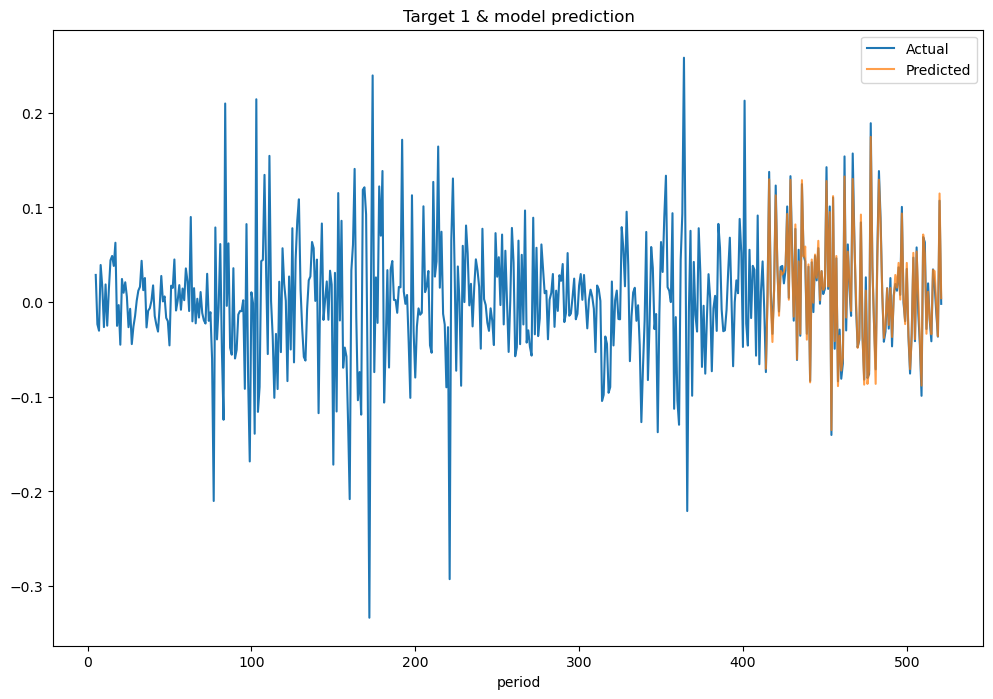

In [492]:
predictions = t1_regressor.predict(X_test1)
y1_eval = pd.DataFrame({'period': y_test1.index,'actual':y_test1.values, 'prediction': predictions})
y1_eval.set_index('period', inplace=True)

ax1 = y1.plot(figsize = (12,8))
y1_eval['prediction'].plot(ax = ax1, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax1.set_title('Target 1 & model prediction')
plt.show();

In [493]:
# r-squared nchanged as they were unused
t1_rsq = r2_score(y1_eval['actual'], y1_eval['prediction'])
t1_rsq

0.9844283672895106

In [494]:
df_t2 = X_trainable.copy()[t2_features_tuned]
X_train2 = df_t2.loc[df_t2.index < separator]
X_test2 = df_t2.loc[df_t2.index >= separator]
y_train2 = y2.loc[y2.index < separator]
y_test2 = y2.loc[y2.index >= separator]

t2_regressor = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.1)
t2_regressor.fit(X_train2, y_train2,
                 eval_set = [(X_train2, y_train2), (X_test2, y_test2)],
                 verbose = 100)

fi2 = pd.DataFrame(t2_regressor.feature_importances_, index = t2_regressor.feature_names_in_, columns = ['importance'])
fi2

[0]	validation_0-rmse:0.47120	validation_1-rmse:0.46587
[100]	validation_0-rmse:0.00428	validation_1-rmse:0.03765
[200]	validation_0-rmse:0.00099	validation_1-rmse:0.03757
[295]	validation_0-rmse:0.00099	validation_1-rmse:0.03757


,importance
Feature 254,0.008763
Feature 255,0.014256
Feature 256,0.004026
Feature 257,0.007883
Feature 260,0.915100
Feature 261,0.003602
Feature 262,0.002302
Feature 263,0.003011
Feature 264,0.002603
Feature 265,0.005997


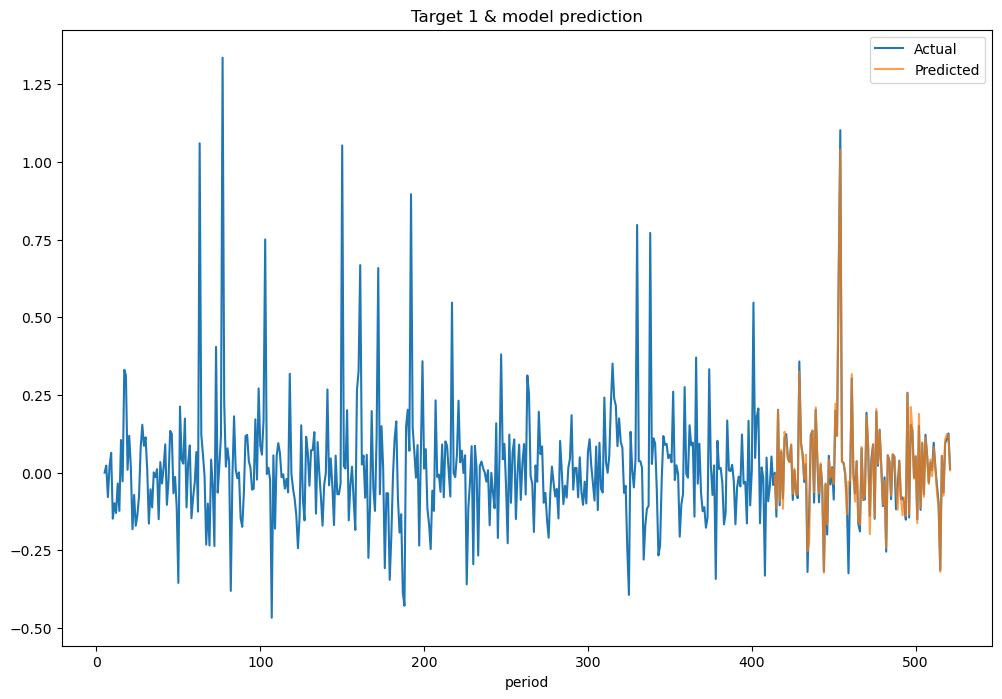

In [495]:
predictions = t2_regressor.predict(X_test2)
y2_eval = pd.DataFrame({'period': y_test2.index,'actual':y_test2.values, 'prediction': predictions})
y2_eval.set_index('period', inplace=True)

ax2 = y2.plot(figsize = (12,8))
y2_eval['prediction'].plot(ax = ax2, style = "-", alpha = 0.75)
plt.legend(['Actual', 'Predicted'])
ax2.set_title('Target 1 & model prediction')
plt.show();

In [429]:
# r-squared nchanged as they were unused
t2_rsq = r2_score(y2_eval['actual'], y2_eval['prediction'])
t2_rsq

0.9533642064722575

## Final Univariate Models

t1_regressor variable

t2_regressor variable